In [1]:
%matplotlib inline
from decay_compare import *

/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
%%time
batemans, crammeds, diagexps = run_nuclides(verbose=True)

Running nuc H1
Running nuc H2
Running nuc H3
Running nuc H4
Running nuc H5
Running nuc H6
Running nuc H7
Running nuc He3
Running nuc He4
Running nuc He5
Running nuc He6
Running nuc He7
Running nuc He8
Running nuc He9
Running nuc He10
Running nuc Li3
Running nuc Li4
Running nuc Li5
Running nuc Li6
Running nuc Li7
Running nuc Li8
Running nuc Li9
Running nuc Li10
Running nuc Li11
Running nuc Li12
Running nuc Li13
Running nuc Be5
Running nuc Be6
Running nuc Be7
Running nuc Be8
Running nuc Be9
Running nuc Be10
Running nuc Be11
Running nuc Be12
Running nuc Be13
Running nuc Be14
Running nuc Be15
Running nuc Be16
Running nuc B6
Running nuc B7
Running nuc B8
Running nuc B9
Running nuc B10
Running nuc B11
Running nuc B12
Running nuc B13
Running nuc B14
Running nuc B15
Running nuc B16
Running nuc B17
Running nuc B18
Running nuc B19
Running nuc B20
Running nuc B21
Running nuc C8
Running nuc C9
Running nuc C10
Running nuc C11
Running nuc C12
Running nuc C13
Running nuc C14
Running nuc C15
Running n

Running nuc Fe45
Running nuc Fe46
Running nuc Fe47
Running nuc Fe48
Running nuc Fe49
Running nuc Fe50
Running nuc Fe51
Running nuc Fe52
Running nuc Fe53
Running nuc Fe54
Running nuc Fe55
Running nuc Fe56
Running nuc Fe57
Running nuc Fe58
Running nuc Fe59
Running nuc Fe60
Running nuc Fe61
Running nuc Fe62
Running nuc Fe63
Running nuc Fe64
Running nuc Fe65
Running nuc Fe66
Running nuc Fe67
Running nuc Fe68
Running nuc Fe69
Running nuc Fe70
Running nuc Fe71
Running nuc Fe72
Running nuc Fe73
Running nuc Fe74
Running nuc Co47
Running nuc Co48
Running nuc Co49
Running nuc Co50
Running nuc Co51
Running nuc Co52
Running nuc Co53
Running nuc Co54
Running nuc Co55
Running nuc Co56
Running nuc Co57
Running nuc Co58
Running nuc Co58M
Running nuc Co59
Running nuc Co59M
Running nuc Co60
Running nuc Co60M
Running nuc Co61
Running nuc Co61M
Running nuc Co62
Running nuc Co63
Running nuc Co64
Running nuc Co65
Running nuc Co66
Running nuc Co67
Running nuc Co68
Running nuc Co69
Running nuc Co70
Running nu

Running nuc Y109
Running nuc Zr78
Running nuc Zr79
Running nuc Zr80
Running nuc Zr81
Running nuc Zr82
Running nuc Zr83
Running nuc Zr84
Running nuc Zr85
Running nuc Zr86
Running nuc Zr87
Running nuc Zr88
Running nuc Zr89
Running nuc Zr90
Running nuc Zr90M
Running nuc Zr91
Running nuc Zr92
Running nuc Zr93
Running nuc Zr94
Running nuc Zr95
Running nuc Zr96
Running nuc Zr97
Running nuc Zr98
Running nuc Zr99
Running nuc Zr100
Running nuc Zr101
Running nuc Zr102
Running nuc Zr103
Running nuc Zr104
Running nuc Zr105
Running nuc Zr106
Running nuc Zr107
Running nuc Zr108
Running nuc Zr109
Running nuc Zr110
Running nuc Zr111
Running nuc Zr112
Running nuc Nb81
Running nuc Nb82
Running nuc Nb83
Running nuc Nb84
Running nuc Nb85
Running nuc Nb86
Running nuc Nb87
Running nuc Nb88
Running nuc Nb89
Running nuc Nb90
Running nuc Nb91
Running nuc Nb92
Running nuc Nb93
Running nuc Nb93M
Running nuc Nb94
Running nuc Nb94M
Running nuc Nb95
Running nuc Nb95M
Running nuc Nb96
Running nuc Nb97
Running nuc Nb

Running nuc Sn136
Running nuc Sn137
Running nuc Sn138
Running nuc Sb103
Running nuc Sb104
Running nuc Sb105
Running nuc Sb106
Running nuc Sb107
Running nuc Sb108
Running nuc Sb109
Running nuc Sb110
Running nuc Sb111
Running nuc Sb112
Running nuc Sb113
Running nuc Sb114
Running nuc Sb115
Running nuc Sb116
Running nuc Sb117
Running nuc Sb118
Running nuc Sb119
Running nuc Sb120
Running nuc Sb121
Running nuc Sb122
Running nuc Sb122M
Running nuc Sb123
Running nuc Sb124
Running nuc Sb124M
Running nuc Sb125
Running nuc Sb126
Running nuc Sb126M
Running nuc Sb127
Running nuc Sb128
Running nuc Sb128M
Running nuc Sb129
Running nuc Sb130
Running nuc Sb130M
Running nuc Sb131
Running nuc Sb132
Running nuc Sb132M
Running nuc Sb133
Running nuc Sb134
Running nuc Sb134M
Running nuc Sb135
Running nuc Sb136
Running nuc Sb137
Running nuc Sb138
Running nuc Sb139
Running nuc Sb140
Running nuc Te105
Running nuc Te106
Running nuc Te107
Running nuc Te108
Running nuc Te109
Running nuc Te110
Running nuc Te111
Run

Running nuc Pm152
Running nuc Pm152M
Running nuc Pm153
Running nuc Pm154
Running nuc Pm154M
Running nuc Pm155
Running nuc Pm156
Running nuc Pm157
Running nuc Pm158
Running nuc Pm159
Running nuc Pm160
Running nuc Pm161
Running nuc Pm162
Running nuc Pm163
Running nuc Sm128
Running nuc Sm129
Running nuc Sm130
Running nuc Sm131
Running nuc Sm132
Running nuc Sm133
Running nuc Sm134
Running nuc Sm135
Running nuc Sm136
Running nuc Sm137
Running nuc Sm138
Running nuc Sm139
Running nuc Sm140
Running nuc Sm141
Running nuc Sm142
Running nuc Sm143
Running nuc Sm144
Running nuc Sm145
Running nuc Sm146
Running nuc Sm147
Running nuc Sm148
Running nuc Sm149
Running nuc Sm150
Running nuc Sm151
Running nuc Sm152
Running nuc Sm153
Running nuc Sm154
Running nuc Sm155
Running nuc Sm156
Running nuc Sm157
Running nuc Sm158
Running nuc Sm159
Running nuc Sm160
Running nuc Sm161
Running nuc Sm162
Running nuc Sm163
Running nuc Sm164
Running nuc Sm165
Running nuc Eu130
Running nuc Eu131
Running nuc Eu132
Running 

Running nuc Ta190
Running nuc Ta191
Running nuc Ta192
Running nuc W157
Running nuc W158
Running nuc W159
Running nuc W160
Running nuc W161
Running nuc W162
Running nuc W163
Running nuc W164
Running nuc W165
Running nuc W166
Running nuc W167
Running nuc W168
Running nuc W169
Running nuc W170
Running nuc W171
Running nuc W172
Running nuc W173
Running nuc W174
Running nuc W175
Running nuc W176
Running nuc W177
Running nuc W178
Running nuc W179
Running nuc W180
Running nuc W181
Running nuc W182
Running nuc W183
Running nuc W183M
Running nuc W184
Running nuc W185
Running nuc W185M
Running nuc W186
Running nuc W187
Running nuc W188
Running nuc W189
Running nuc W190
Running nuc W191
Running nuc W192
Running nuc W193
Running nuc W194
Running nuc Re159
Running nuc Re160
Running nuc Re161
Running nuc Re162
Running nuc Re163
Running nuc Re164
Running nuc Re165
Running nuc Re166
Running nuc Re167
Running nuc Re168
Running nuc Re169
Running nuc Re170
Running nuc Re171
Running nuc Re172
Running nuc 

Running nuc Po211
Running nuc Po211M
Running nuc Po212
Running nuc Po213
Running nuc Po214
Running nuc Po215
Running nuc Po216
Running nuc Po217
Running nuc Po218
Running nuc Po219
Running nuc Po220
Running nuc Po221
Running nuc Po222
Running nuc Po223
Running nuc Po224
Running nuc Po225
Running nuc Po226
Running nuc Po227
Running nuc At191
Running nuc At192
Running nuc At193
Running nuc At194
Running nuc At195
Running nuc At196
Running nuc At197
Running nuc At198
Running nuc At199
Running nuc At200
Running nuc At201
Running nuc At202
Running nuc At203
Running nuc At204
Running nuc At205
Running nuc At206
Running nuc At207
Running nuc At208
Running nuc At209
Running nuc At210
Running nuc At211
Running nuc At212
Running nuc At213
Running nuc At214
Running nuc At215
Running nuc At216
Running nuc At217
Running nuc At218
Running nuc At219
Running nuc At220
Running nuc At221
Running nuc At222
Running nuc At223
Running nuc At224
Running nuc At225
Running nuc At226
Running nuc At227
Running n

Running nuc Fm255
Running nuc Fm256
Running nuc Fm257
Running nuc Fm258
Running nuc Fm259
Running nuc Fm260
Running nuc Md245
Running nuc Md246
Running nuc Md247
Running nuc Md248
Running nuc Md249
Running nuc Md250
Running nuc Md251
Running nuc Md252
Running nuc Md253
Running nuc Md254
Running nuc Md255
Running nuc Md256
Running nuc Md257
Running nuc Md258
Running nuc Md259
Running nuc Md260
Running nuc Md261
Running nuc Md262
Running nuc No248
Running nuc No249
Running nuc No250
Running nuc No251
Running nuc No252
Running nuc No253
Running nuc No254
Running nuc No255
Running nuc No256
Running nuc No257
Running nuc No258
Running nuc No259
Running nuc No260
Running nuc No261
Running nuc No262
Running nuc No263
Running nuc No264
Running nuc Lr251
Running nuc Lr252
Running nuc Lr253
Running nuc Lr254
Running nuc Lr255
Running nuc Lr256
Running nuc Lr257
Running nuc Lr258
Running nuc Lr259
Running nuc Lr260
Running nuc Lr261
Running nuc Lr262
Running nuc Lr263
Running nuc Lr264
Running nu

In [6]:
NNUCS = len(crammeds)

In [10]:
b = np.zeros((NTIMES, NNUCS), dtype=float)
c = np.zeros((NTIMES, NNUCS), dtype=float)
d = np.zeros((NTIMES, NNUCS), dtype=float)
for n, nuc in enumerate(cram.NUCS):
    b[:, n] = batemans[nuc][nuc]
    c[:, n] = crammeds[nuc][nuc]
    d[:, n] = diagexps[nuc][nuc]

In [16]:
diagdiff = np.abs(d - c)
mu_diagdiff = diagdiff.mean(axis=1)
sigma_diagdiff = diagdiff.std(axis=1)

In [18]:
sigma_diagdiff

array([  0.000000000000000000e+00,   3.926921608966439989e-15,
         2.613455154789268979e-15,   2.281196738987002675e-15,
         1.946315734451703036e-15,   1.881102326766254551e-15,
         1.721613384186274954e-15,   1.623984235063350698e-15])

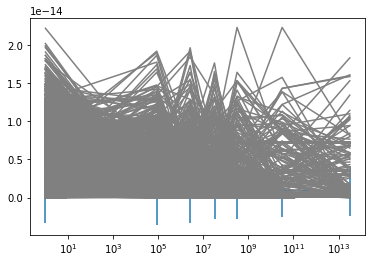

In [28]:
plt.plot(TIMES[1:], diagdiff[1:, :], color='gray')
plt.errorbar(TIMES[1:], mu_diagdiff[1:], yerr=2*sigma_diagdiff[1:], barsabove=True)
plt.xscale('log')